# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

In [3]:
fig = px.scatter(student_data, x = "Age", y = "Tardies", title="Age vs. Tardies")
fig.update_yaxes(scaleanchor="x", scaleratio=1) 
fig.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Answer: In the scatter plot of "Age vs Tardies", as the age increases, the Tardies seem to decrease linearly (negative correlation).

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# correlation: Measures both strength and direction (unit free/ range [-1,1]). 
corr = student_data.corr()
print("Pearson Correlation: \n", corr)

# covariance: indicates the direction of a linear relationship but is affected by scale.
cov = student_data.cov()
print("\nCovariance: \n", cov)


Pearson Correlation: 
               Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000

Covariance: 
                 Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


In [5]:
# While the correlation can provide both strength and the direction of the relationship
# between two variables, the covariance can only provide the direction, because it is affected
# by the scale.

# After obtaining both covariance and correlation for our variables Age and Tardies, both
# parameters indicate a negative relationship. The correlation also indicates that there
# is a strong dependency between the two variables.


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# X: training data(n_samples, n_features)
# y: Target values (n_samples,) or (n_samples, n_targets)

from sklearn.model_selection import train_test_split
X = np.array(student_data.Age.to_list())
y = np.array(student_data.Tardies.to_list())
seed = 13
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


In [7]:
# Regression type: linear
# Since the relationship between Age and Tardies is approximately linear, I will use
# a linear regression to fit the data.

linear_regression = LinearRegression()
linear_regression.fit(X_train.reshape(-1,1), y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [8]:
# ax + b
a = linear_regression.coef_
b = linear_regression.intercept_

print(b, a)

12.59142640364188 [-0.24127466]


Plot your regression model on your scatter plot.

In [9]:
# Getting the data to plot the line
x = np.linspace(X.min(), X.max(), num=10)
y = a[0]*x + b


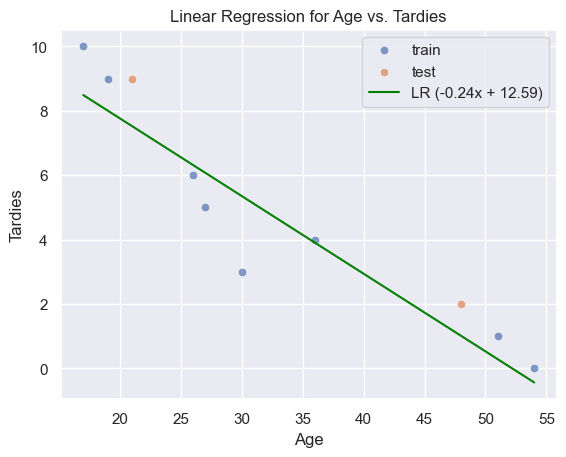

In [10]:
label_line = "LR ({:.2f}x + {:.2f})".format(a[0], b)


sns.set_theme()
sns.scatterplot(x = X_train, y = y_train, label = "train", alpha = 0.7)
sns.scatterplot(x = X_test, y = y_test, label = "test", alpha = 0.7)
sns.lineplot(x = x, y= y, color = "green", label = label_line)

plt.xlabel("Age")      
plt.ylabel("Tardies")  
plt.legend()
plt.title("Linear Regression for Age vs. Tardies")
plt.show()


In [11]:
print("Test set predictions: ")
predicted_test = linear_regression.predict(X_test.reshape(-1,1))
print("Predicted: ",predicted_test )
print("Ground Truth: ", y_test)

print("Train set predictions: ")
predicted_train = linear_regression.predict(X_train.reshape(-1,1))
print("Predicted: ", predicted_train)
print("Ground Truth: ", y_train)


Test set predictions: 
Predicted:  [7.52465857 1.01024279]
Ground Truth:  [9 2]
Train set predictions: 
Predicted:  [ 8.00720789  0.28641882  3.90553869  6.31828528 -0.43740516  5.35318665
  8.48975721  6.07701062]
Ground Truth:  [ 9  1  4  6  0  3 10  5]


In [12]:
from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

# R2: best possible score is 1.0
print("Score (Coefficient of determination): ")
str_train = f"Train Set: {linear_regression.score(X_train.reshape(-1,1), y_train)}"
str_test = f"Test Set: {linear_regression.score(X_test.reshape(-1,1), y_test)}"

print(str_train, "|", str_test)

print("MSE (Mean Square Error)")

str_train = f"Train Set: {mean_squared_error(predicted_train, y_train)}"
str_test = f"Test Set: {mean_squared_error(predicted_test, y_test)}"

print(str_train, "|", str_test)


Score (Coefficient of determination): 
Train Set: 0.8768610448731845 | Test Set: 0.8711734018353303
MSE (Mean Square Error)
Train Set: 1.3468323216995441 | Test Set: 1.578125827517204


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

Answer: According to the visual analysis, the curve seems to fit well considering the limitations of a linear regression. Through the analysis of the coefficient of determination, we verify that
the metric is close to 0.9 for both the train and test sets, which indicates a good fit. Thus, we can conclude that the age is a good predictor or tardiness.   

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [13]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<Axes: >

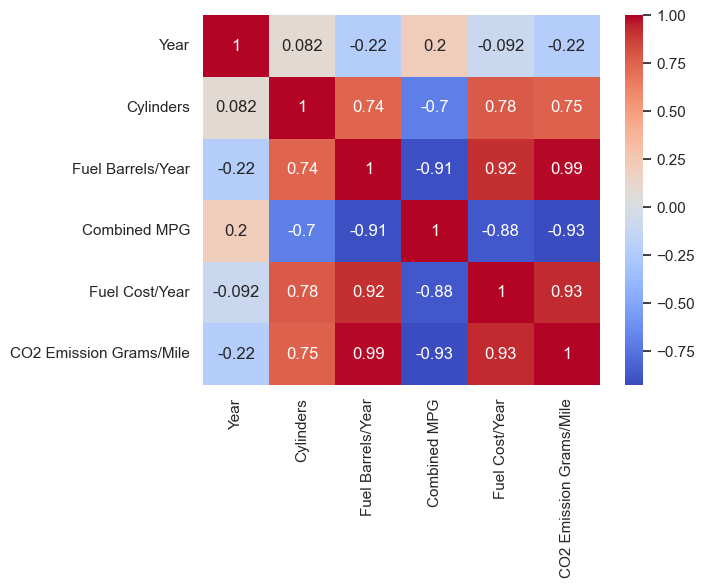

In [14]:
corr = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]].corr()

sns.heatmap(corr, cmap="coolwarm", annot=True)

# Considering that we want to predict the "CO2 Emission Grams/Mile", the variables that presented the 
# strongest correlation (either positive or negative) with it where "Fuel Barrels/Year", "Combined MPG",
# and "Fuel Cost/Year", 0.99, -0.93, 0.93. "Cylinders" also presented significant correlation with "CO2 Emission Grams/Mile", 0.75. 



Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [15]:
# The strongest correlation was between "Fuel Barrels/Year" and "CO2 Emission Grams/Mile"

fig = px.scatter(vehicles, x = "Fuel Barrels/Year", y = "CO2 Emission Grams/Mile", title="Fuel Barrels/Year vs. CO2 Emission Grams/Mile")

# fig.update_yaxes(scaleanchor="x", scaleratio=1) 
fig.show()



In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# X: training data(n_samples, n_features)
# y: Target values (n_samples,) or (n_samples, n_targets)

from sklearn.model_selection import train_test_split
X = np.array(vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]])
y = np.array(vehicles["CO2 Emission Grams/Mile"])

seed = 13
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Regression type: linear using 5 variables as input
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

# R2: best possible score is 1.0
y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)

print("Score (Coefficient of determination): ")
str_train = f"Train Set: {r2_score(y_train, y_pred_train)}"
str_test = f"Test Set: {r2_score(y_test, y_pred_test)}"

print(str_train, "|", str_test)

print("MSE (Mean Square Error)")

str_train = f"Train Set: {mean_squared_error(y_pred_train, y_train)}"
str_test = f"Test Set: {mean_squared_error(y_pred_test, y_test)}"

print(str_train, "|", str_test)


Score (Coefficient of determination): 
Train Set: 0.9809447003625275 | Test Set: 0.9805901412104098
MSE (Mean Square Error)
Train Set: 267.99963151555477 | Test Set: 283.7337120940202


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [18]:
import statsmodels.api as sm

estimator = sm.OLS(y_train, X_train)
estimator = estimator.fit()
estimator.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.932e+06
Date:                Fri, 06 Feb 2026   Prob (F-statistic):                        0.00
Time:                        18:00:33   Log-Likelihood:                     -1.2182e+05
No. Observations:               28761   AIC:                                  2.436e+05
Df Residuals:                   28756   BIC:                                  2.437e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0629      0.001     65.798      0.000       0.061       0.065
x2             0.8645      0.090      9.569      0.000       0.687       1.042
x3            19.9467      0.066    302.879      0.000      19.818      20.076
x4            -3.0506      0.049    -62.550      0.000      -3.146      -2.955
x5             0.0285      0.001     52.804      0.000       0.027       0.030
==============================================================================
Omnibus:                    58972.686   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        247908747.535
Skew:                          17.254   Prob(JB):                         0.00
Kurtosis:                     456.520   Cond. No.                     2.55e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [19]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [20]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [21]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*